In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')


def get_price_table(code, start='2012-01-01', end='2020-05-10'):
      temp = []
      adj_close_data = []

      for i in code:
          temp.append(web.DataReader(name='{}'.format(
              i), data_source='yahoo', start=start, end=end))
          print('Finding  {}'.format(i))

      for j in temp:
          adj_close_data.append(j['Adj Close'])
      close_df = pd.concat(adj_close_data, axis=1, keys=code, join='inner')

      return close_df

C:\ProgramData\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
df = get_price_table(['^TWII', "0050.TW"])
df.head()

Finding  ^TWII
Finding  0050.TW


,^TWII,0050.TW
Date,,
2012-01-02,6952.184082,39.422428
2012-01-03,7053.354004,39.936703
2012-01-04,7082.943848,40.177773
2012-01-05,7130.833008,40.298302
2012-01-06,7120.482910,40.177773


# 用台指和0050股價和基金淨值做相關分析

In [3]:
fundprice = pd.read_csv('nomura.csv', sep='\t')

In [4]:
fundprice.head()

,基金碼,簡稱,年月日,市價(元),淨值(元),溢(折)價率%,幣別,近一個月變動率%
0,T3201S,野村優質S,20190510,-,9.80,-,NTD,-1.606427
1,T3201Y,野村優質,20190510,-,35.61,-,NTD,-1.602652
2,T3203Y,野村成長,20190510,-,29.95,-,NTD,-0.729206
3,T3204Y,野村平衡,20190510,-,19.34,-,NTD,-0.667694
4,T3205Y,野村e 科技,20190510,-,19.09,-,NTD,-2.202869


In [5]:
df1 = fundprice[['年月日','簡稱','淨值(元)']]
df1.head()

,年月日,簡稱,淨值(元)
0,20190510,野村優質S,9.80
1,20190510,野村優質,35.61
2,20190510,野村成長,29.95
3,20190510,野村平衡,19.34
4,20190510,野村e 科技,19.09


In [6]:
fund = df1.pivot(index="年月日", columns='簡稱', values='淨值(元)')
fund.index = pd.to_datetime (fund.index, format="%Y%m%d")
fund

簡稱,野村2024新債Aa,野村2024新債Aa$,野村2024新債AaC,野村2024新債Bb,野村2024新債Bb$,野村2024新債BbC,野村2025企債Aa,野村2025企債Aa$,野村2025企債AaC,野村2025企債AaZ,...,野村邊境高主債BC,野村邊境高主債S,野村鑫全球債,野村鑫全球債S,野村鑫平衡組,野村鑫平衡組S,野村高科技,野村鴻利,野村鴻揚貨幣,野村鴻運
年月日,,,,,,,,,,,,,,,,,,,,,
2019-05-10,10.4464,10.5162,10.5447,10.3439,10.3454,10.3572,NaN,NaN,NaN,NaN,...,9.8697,10.0000,13.6901,10.4493,14.97,10.08,10.00,23.28,16.8935,19.21
2019-05-13,10.4612,10.5246,10.5483,10.3585,10.3537,10.3607,NaN,NaN,NaN,NaN,...,9.8056,10.0000,13.7106,10.4651,14.93,10.05,9.71,22.96,16.8939,18.93
2019-05-14,10.4356,10.4996,10.5291,10.3332,10.3291,10.3418,NaN,NaN,NaN,NaN,...,9.8102,10.0000,13.6960,10.4540,14.93,10.05,9.75,22.80,16.8940,18.97
2019-05-15,10.4448,10.5105,10.5423,10.3423,10.3398,10.3548,NaN,NaN,NaN,NaN,...,9.8331,10.0000,13.7110,10.4655,14.93,10.05,9.90,23.10,16.8942,19.10
2019-05-16,10.4490,10.5134,10.5462,10.3465,10.3427,10.3586,NaN,NaN,NaN,NaN,...,9.8582,10.0000,13.7305,10.4805,15.07,10.14,9.62,22.85,16.8943,18.72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,9.9210,10.1702,10.2866,9.6008,9.6185,9.7388,8.9012,9.0975,9.1239,9.8606,...,7.5091,7.5071,13.1675,10.0704,14.49,9.77,12.13,25.18,16.9459,20.92
2020-05-05,9.9371,10.1863,10.3020,9.6163,9.6337,9.7533,8.9036,9.1006,9.1274,9.8389,...,7.6027,7.5071,13.1789,10.0792,14.59,9.84,12.14,25.12,16.9460,20.97
2020-05-06,9.9524,10.2014,10.3057,9.6311,9.6480,9.7567,8.9156,9.1112,9.1269,9.8628,...,7.6584,7.5071,13.1513,10.0581,14.58,9.83,12.15,25.28,16.9461,21.14


In [7]:
data = pd.concat([fund, df], axis=1, join='inner')
data

,野村2024新債Aa,野村2024新債Aa$,野村2024新債AaC,野村2024新債Bb,野村2024新債Bb$,野村2024新債BbC,野村2025企債Aa,野村2025企債Aa$,野村2025企債AaC,野村2025企債AaZ,...,野村鑫全球債,野村鑫全球債S,野村鑫平衡組,野村鑫平衡組S,野村高科技,野村鴻利,野村鴻揚貨幣,野村鴻運,^TWII,0050.TW
2019-05-10,10.4464,10.5162,10.5447,10.3439,10.3454,10.3572,NaN,NaN,NaN,NaN,...,13.6901,10.4493,14.97,10.08,10.00,23.28,16.8935,19.21,10712.990234,78.267029
2019-05-13,10.4612,10.5246,10.5483,10.3585,10.3537,10.3607,NaN,NaN,NaN,NaN,...,13.7106,10.4651,14.93,10.05,9.71,22.96,16.8939,18.93,10558.290039,76.970581
2019-05-14,10.4356,10.4996,10.5291,10.3332,10.3291,10.3418,NaN,NaN,NaN,NaN,...,13.6960,10.4540,14.93,10.05,9.75,22.80,16.8940,18.97,10519.250000,76.490410
2019-05-15,10.4448,10.5105,10.5423,10.3423,10.3398,10.3548,NaN,NaN,NaN,NaN,...,13.7110,10.4655,14.93,10.05,9.90,23.10,16.8942,19.10,10560.709961,76.586441
2019-05-16,10.4490,10.5134,10.5462,10.3465,10.3427,10.3586,NaN,NaN,NaN,NaN,...,13.7305,10.4805,15.07,10.14,9.62,22.85,16.8943,18.72,10474.610352,75.914215
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-04,9.9210,10.1702,10.2866,9.6008,9.6185,9.7388,8.9012,9.0975,9.1239,9.8606,...,13.1675,10.0704,14.49,9.77,12.13,25.18,16.9459,20.92,10720.480469,83.000000
2020-05-05,9.9371,10.1863,10.3020,9.6163,9.6337,9.7533,8.9036,9.1006,9.1274,9.8389,...,13.1789,10.0792,14.59,9.84,12.14,25.12,16.9460,20.97,10774.610352,83.400002
2020-05-06,9.9524,10.2014,10.3057,9.6311,9.6480,9.7567,8.9156,9.1112,9.1269,9.8628,...,13.1513,10.0581,14.58,9.83,12.15,25.28,16.9461,21.14,10774.980469,83.500000
2020-05-07,NaN,NaN,NaN,NaN,NaN,NaN,8.9298,9.1245,9.1478,9.8862,...,13.1841,10.0833,14.73,9.93,12.38,25.56,16.9462,21.50,10842.919922,83.849998


### 依序列出和台指相關係數高的前10隻野村基金

股價與淨值

In [8]:
printdata = data.corr()['^TWII'].sort_values(ascending=False)
for i in range(len(printdata)):
  print("{}            {}".format(printdata.index[i], printdata[i]))

^TWII            1.0
野村亞太高股息 A            0.9510514526300831
野村亞太高股息 B            0.9464380789416728
野村多收多重NdC            0.9403591810488419
野村多收多重Nd$            0.9384349650783785
野村動態多重AC            0.9294721029280005
野村多收多重Nd            0.9289266283817964
野村多收多重Na            0.9289266283817964
0050.TW            0.9280049538361826
野村台灣高股             0.923735471742184
野村動態多重A$            0.9205608701356738
野村台灣運籌             0.9081902776757463
野村鴻運                 0.9071065834287533
野村動態多重AA            0.9036086857046897
野村多收多重AaC            0.8991655151156089
野村亞太收多重AC            0.8958167437376592
野村動態多重BC            0.8955027603128703
野村環球 USD             0.8948190955401694
野村環球 CNY             0.8939006819912692
野村多收多重Aa$            0.8930427277259892
野村亞太收多重A$            0.8881365716377861
野村動態多重BA            0.880563589132295
野村動態多重BZ            0.879279629942895
野村動態多重B$            0.8777567522196092
野村核心多重資C            0.8761117791283207
野村成長                 0.874755485534179

一階差分

In [9]:
printdata = data.pct_change(1).corr()['^TWII'].sort_values(ascending=False)
for i in range(len(printdata)):
  print("{}            {}".format(printdata.index[i], printdata[i]))

^TWII            1.0
0050.TW            0.9757521989434873
野村平衡                 0.8993086300383543
野村鴻利                 0.8959437881875364
野村成長                 0.8898685506549554
野村台灣高股             0.8883886988841762
野村積極成長             0.8873558602265603
野村台灣運籌             0.8812432918452258
野村亞太收多重A$            0.8782739985952172
野村亞太收多重AC            0.8751564538008966
野村鴻運                 0.8742429329276529
野村優質S                0.873885756743111
野村亞太收多重B$            0.8738111034843102
野村優質                 0.8733960707706245
野村亞太收多重BC            0.8720766097491386
野村亞太高股息 A            0.8591191918962879
野村亞太高股息 B            0.8581467762872708
野村亞太收多重A            0.8550030725784226
野村亞太收多重B            0.8506878971081323
野村中小                 0.839458757957921
野村高科技               0.8249794385822063
野村e 科技               0.8211708398374061
野村新馬                 0.8152659682459298
野村動態多重B$            0.6619094519484358
野村動態多重BC            0.6607561095654058
野村動態多重A$            0.658384852227

### 列出和0050相關係數高的前10隻野村基金

價格

In [10]:
printdata = data.corr()['0050.TW'].sort_values(ascending=False)
for i in range(len(printdata)):
  print("{}            {}".format(printdata.index[i], printdata[i]))

0050.TW            1.0
野村台灣高股             0.9587170498257103
野村優質                 0.955335489219334
野村優質S                0.9549813519036268
野村成長                 0.9481830509548623
野村積極成長             0.9473925612822117
野村平衡                 0.9459615324720355
野村鴻利                 0.9457278054635782
野村中小                 0.9439988515810552
野村台灣運籌             0.9409232334162795
野村鴻運                 0.9344179244034503
^TWII            0.9280049538361826
野村多收多重NdC            0.9243376595631273
野村多收多重Nd$            0.9223120427964998
野村e 科技               0.9134213286267358
野村多收多重Na            0.9128352703075389
野村多收多重Nd            0.9128352703075389
野村高科技               0.9124945917347196
野村全球短收益 C            0.8824516907700917
野村動態多重BZ            0.8423993471980316
野村動態多重AC            0.8416373573703064
野村亞太高股息 A            0.8366335061209201
野村中國機會             0.8352694027534951
野村動態多重AZ            0.8312475648062165
野村環球 CNY             0.8277974268463233
野村動態多重AA            0.82682040651346

變動率

In [11]:
printdata = data.pct_change(1).corr()['0050.TW'].sort_values(ascending=False)
for i in range(len(printdata)):
  print("{}            {}".format(printdata.index[i], printdata[i]))

0050.TW            1.0
^TWII            0.9757521989434873
野村平衡                 0.8643176209623243
野村鴻利                 0.8620001993800934
野村亞太收多重A$            0.8505802573370562
野村亞太收多重AC            0.8502384053483231
野村亞太收多重BC            0.8496583371587145
野村亞太收多重B$            0.848499571359072
野村亞太高股息 A            0.8470479891142818
野村亞太高股息 B            0.8463735027725301
野村成長                 0.8432572515718676
野村積極成長             0.8410696191509983
野村台灣高股             0.8352937194212545
野村台灣運籌             0.8328665873349228
野村優質                 0.8271865601415086
野村優質S                0.8271170954888715
野村亞太收多重A            0.8231957205468846
野村亞太收多重B            0.8214876504019308
野村鴻運                 0.8214786427774446
野村中小                 0.796579424896744
野村新馬                 0.7947268385316919
野村高科技               0.7857936698678887
野村e 科技               0.7817600125377049
野村動態多重BC            0.6353505933628142
野村動態多重B$            0.6328036950122498
野村動態多重AC            0.629347463438

### 直接畫圖會爆炸

股價相關係數的例子

In [12]:
index_of_equity = ["債" not in i for i  in data.columns]
index_of_equity = data.columns[index_of_equity]
subset = data[index_of_equity]

In [13]:
import matplotlib
import matplotlib.font_manager

myfont = matplotlib.font_manager.FontProperties(fname='msfont.ttf')  
plt.rcParams['font.sans-serif']=['Microsoft JhengHei']
plt.rcParams['axes.unicode_minus'] = False  
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})

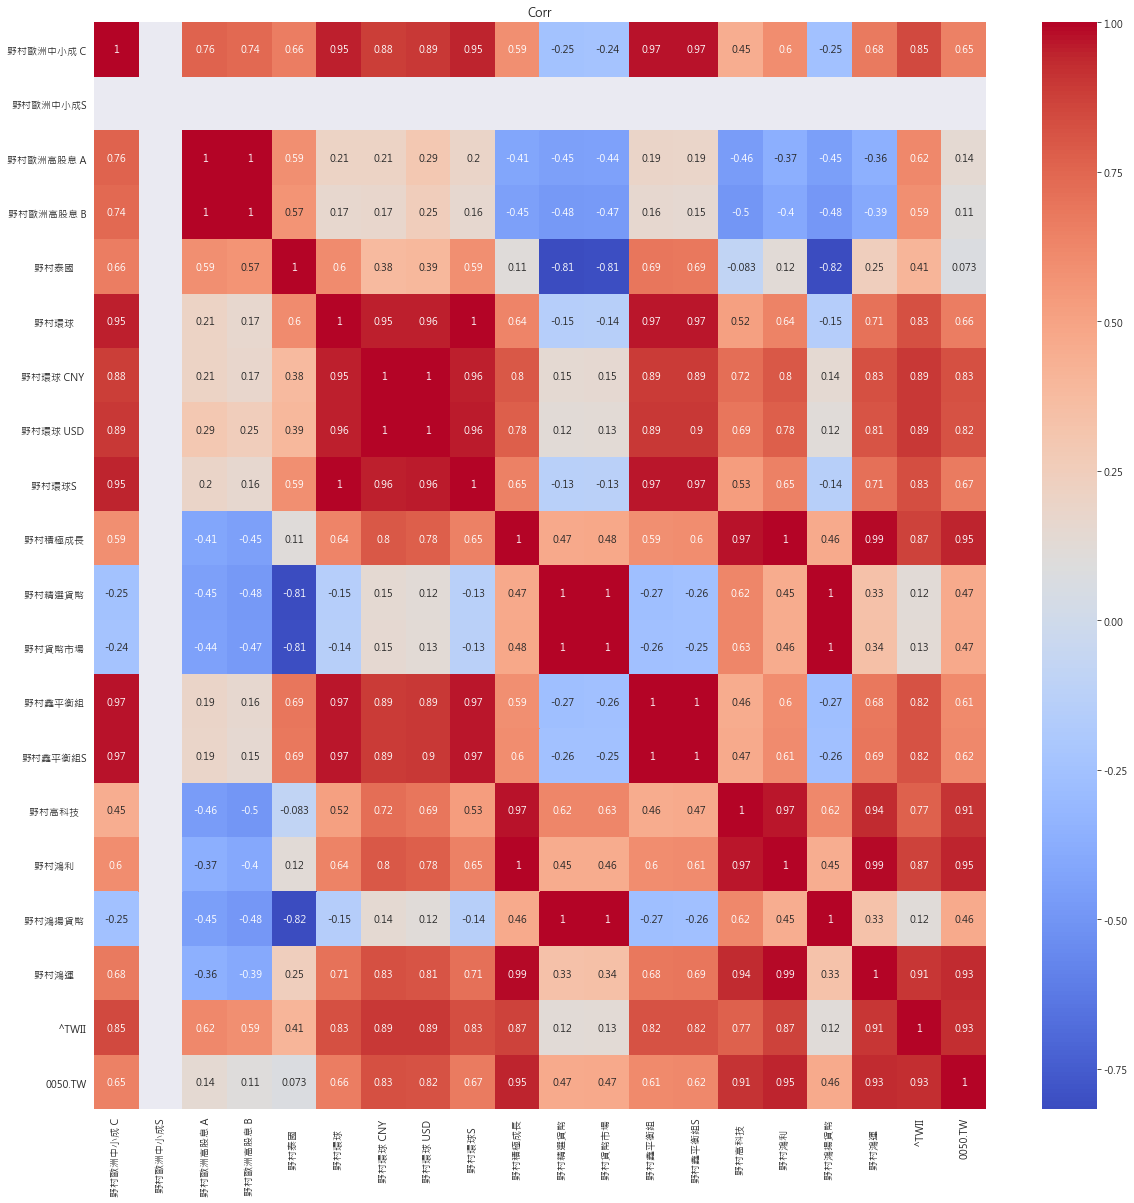

In [26]:
fig, ax = plt.subplots(figsize=(20,20))
#方便辨識，只挑出最後18筆加上股票指數做畫圖示範
sns.heatmap(subset.iloc[:,-20:].corr(), cmap='coolwarm', annot=True)
plt.title("Corr")
plt.show()


# 分析贖回率和股價的關係

In [27]:
fund_data = pd.read_csv('monthly_funds_data_final.csv')

In [28]:
fund_data.head()

,類型代號,基金統編,基金名稱,基金規模市場占有率,受益權單位數,總受益人數,ym,計價幣別,基金規模(台幣),單位淨值(台幣),自然人受益人數,法人受益人數,本月申購總金額(台幣),本月買回總金額(台幣),贖回率,申購率,淨值漲跌
0,2,00989005,<U+6ED9>豐<U+6ED9>豐基金,0.08%,19836207.0,1182,200208,TWD,1713801393,86.40,NaN,NaN,17909815.0,17018655.0,NaN,NaN,NaN
1,2,00989005,<U+6ED9>豐<U+6ED9>豐基金,0.07%,18994088.2,1152,200211,TWD,1567967098,82.60,NaN,NaN,11173000.0,45429554.0,NaN,NaN,NaN
2,2,92006298,<U+6ED9>豐100基金,0.01%,20956840.7,1128,200211,TWD,135559132,6.47,NaN,NaN,44390784.0,32162414.0,NaN,NaN,NaN
3,2,92006298,<U+6ED9>豐中華100基金,0.01%,21596688.5,1168,200208,TWD,138785175,6.43,NaN,NaN,4740000.0,803695.0,NaN,NaN,NaN
4,4,18031954,<U+6ED9>豐太平洋精典基金,0.06%,210809197.0,2368,200208,TWD,1409505178,6.69,NaN,NaN,2309797.0,7507750.0,NaN,NaN,NaN


In [48]:
from pandas.tseries.offsets import MonthEnd
fund_data['ym'] = pd.to_datetime(fund_data['ym'],format="%Y%m")+MonthEnd(1)
fund_data = fund_data.sort_values('ym')
fund_data.head()

,類型代號,基金統編,基金名稱,基金規模市場占有率,受益權單位數,總受益人數,ym,計價幣別,基金規模(台幣),單位淨值(台幣),自然人受益人數,法人受益人數,本月申購總金額(台幣),本月買回總金額(台幣),贖回率,申購率,淨值漲跌
12421,2,83863951,元大經貿基金,0.09%,8.294638e+07,16688,2000-08-31,TWD,1204664131,14.5200,NaN,NaN,6.408929e+07,5.617335e+07,NaN,NaN,NaN
20925,6,81580387,日盛債券基金,2.02%,2.293695e+09,1847,2000-08-31,TWD,26781216295,11.6760,NaN,NaN,8.799903e+09,8.348998e+09,NaN,NaN,NaN
188219,6,81598540,聯合聯合債券基金,0.69%,8.103306e+08,274,2000-08-31,TWD,9090112613,11.2178,NaN,NaN,5.136680e+09,3.629315e+09,NaN,NaN,NaN
120765,2,18030218,富達台灣基金,0.38%,5.343995e+08,12712,2000-08-31,TWD,5016437806,9.3900,NaN,NaN,5.339393e+09,0.000000e+00,NaN,NaN,NaN
158617,2,17604341,新光摩天基金,0.23%,3.612002e+08,6427,2000-08-31,TWD,3002455224,8.3100,NaN,NaN,3.720815e+06,4.501749e+07,NaN,NaN,NaN


In [50]:
df1 = df.reset_index()
#以一個月平均交易日20天作為滑動基準
df1['Delta_TWII'] = df1['^TWII']  - df1.shift(20)['^TWII']
df1['Delta_0050'] = df1['0050.TW'] -  df1.shift(20)['0050.TW']
df1['Pct_TWII'] = df1['^TWII'].pct_change(20)
df1['Pct_0050'] = df1['0050.TW'].pct_change(20)
df1.head(30)

,Date,^TWII,0050.TW,Delta_TWII,Delta_0050,Pct_TWII,Pct_0050
0,2012-01-02,6952.184082,39.422428,NaN,NaN,NaN,NaN
1,2012-01-03,7053.354004,39.936703,NaN,NaN,NaN,NaN
2,2012-01-04,7082.943848,40.177773,NaN,NaN,NaN,NaN
3,2012-01-05,7130.833008,40.298302,NaN,NaN,NaN,NaN
4,2012-01-06,7120.482910,40.177773,NaN,NaN,NaN,NaN
5,2012-01-09,7093.013672,40.025089,NaN,NaN,NaN,NaN
6,2012-01-10,7178.842773,40.740257,NaN,NaN,NaN,NaN
7,2012-01-11,7188.182617,40.700085,NaN,NaN,NaN,NaN
8,2012-01-12,7186.552734,40.780437,NaN,NaN,NaN,NaN
9,2012-01-13,7181.512695,40.860794,NaN,NaN,NaN,NaN


In [51]:
res = fund_data.merge(df1, left_on='ym', right_on='Date')

# 對個別基金畫相關係數有點難，因為有3000多筆

In [52]:
res.groupby(['基金統編']).count()

,類型代號,基金名稱,基金規模市場占有率,受益權單位數,總受益人數,ym,計價幣別,基金規模(台幣),單位淨值(台幣),自然人受益人數,...,贖回率,申購率,淨值漲跌,Date,^TWII,0050.TW,Delta_TWII,Delta_0050,Pct_TWII,Pct_0050
基金統編,,,,,,,,,,,,,,,,,,,,,
00965469,59,59,59,59,59,59,59,59,59,59,...,54,54,54,59,59,59,58,58,58,58
00968493,59,59,59,59,59,59,59,59,59,59,...,54,54,54,59,59,59,58,58,58,58
00968521,18,18,18,18,18,18,18,18,18,18,...,17,17,17,18,18,18,17,17,17,17
00971080,59,59,59,59,59,59,59,59,59,59,...,54,54,54,59,59,59,58,58,58,58
00971103,59,59,59,59,59,59,59,59,59,59,...,54,54,54,59,59,59,58,58,58,58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991502,34,34,34,34,34,34,34,34,34,34,...,31,31,31,34,34,34,33,33,33,33
99991502A,25,25,25,25,25,25,25,25,25,25,...,22,22,22,25,25,25,25,25,25,25
99991502B,25,25,25,25,25,25,25,25,25,25,...,21,22,22,25,25,25,25,25,25,25


但是可以假設各個基金是均質的

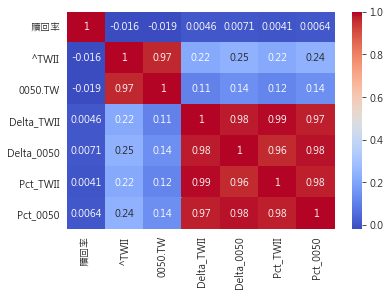

In [53]:
plotdata = res[['贖回率', '^TWII', '0050.TW', 'Delta_TWII', 'Delta_0050', 'Pct_TWII', 'Pct_0050']]

sns.heatmap(plotdata.corr(),cmap='coolwarm', annot=True)

不是很顯著，我們可以用分開回歸的方式再來做做看

In [54]:
from statsmodels.formula.api import ols

In [55]:
# model = ols('贖回率 ~ Pct_TWII+Pct_0050', g)
# results = model.fit()
# record = record.append( pd.DataFrame({
# "基金統編":[i],
#         "基金名稱":g['基金名稱'].iloc[0],
#          "R2":[results.rsquared_adj],
#          "Intercept":results.params[0],
#          "Pct_TWII":results.params[1],
#          "Pct_0050":results.params[2],
#         }))

In [57]:
record = pd.DataFrame()
count = 0

for i, g in res.groupby(['基金統編']):
    try:
        model = ols('贖回率 ~ Pct_TWII+Pct_0050', g)
        results = model.fit()
        record = record.append( pd.DataFrame({
        "基金統編":[i],
        "基金名稱":g['基金名稱'].iloc[0],
        "R2":[results.rsquared_adj],
        "Intercept":results.params[0],
        "Pct_TWII":results.params[1],
        "Pct_0050":results.params[2],
    }))
    except:
        pass
    count += 1
    print(i, count)

00965469 1
00968493 2
00968521 3
00971080 4
00971103 5
00971976 6
00973762 7
00974018 8
00974018A 9
00974018B 10
00974039 11
00974066 12
00974241 13
00988316 14
00992769 15
01013051 16
01021518 17
01021518A 18
01021518B 19
01021518C 20
01021518D 21
01031298 22
01031298A 23
01031298B 24
01031564 25
01031699 26
01031699A 27
01031699B 28
01031706 29
01031874 30
01031874A 31
01031874B 32
01032058 33
01032162 34
01032183 35


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


01032249 36
01032803 37
01050148 38
10300195 39
10300441 40
10300441A 41
10300441B 42
10300929 43
10303947

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: invalid value encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1685: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


 44
10306986 45
10306992 46
10307015 47
10307155 48
10307606 49
10310200 50
10313109 51
10313190 52
10337833 53
10338642 54
10340936A 55
10340936B 56
10340936C 57
10340936D 58
10340936E 59
10340936F 60
10340936G 61
10340936H 62
10340936I 63
10340936J 64
10340936K 65
10340936L 66
10340936M 67
10340936N 68
10340936O 69
10340936P 70
10340936Q 71
10340936R 72
10340936S 73
10341251 74
10341837 75
10341999 76
10342012 77
10342250 78
10342511 79
10348058 80
10348445

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1698: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1699: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))


 81
10348450 82
10350645 83
10350645A 84
10350645B 85
10350645C 86
10350645D 87
10357632 88
10357632A 89
10357632B 90
10374246 91
10388939A 92
10388939B 93
10397629 94
13528977 95
13530495 96
13539952 97
13984165 98
13984587 99
13986564 100
13986924 101
13989817 102
13998344 103
13998344A 104
13998344B 105
13999821 106
13999857 107
14290085 108
14542287 109
14545897 110
14553777 111
14687516 112
14692623 113
14692638 114
14692638A 115
14692638B 116
14693572 117
14693593 118
14693593A 119
14693593B 120
14694495 121
14696466 122
14697373 123
14699772 124
14703038 125
14705562 126
14706582 127
14916692 128
15566790 129
15588302 130
15733973 131
15739619 132
15742001 133
15743509 134
15743509A 135
15743509B 136
17138818 137
17139204 138
17140568 139
17141187 140
17141530 141
17142502 142
17144332 143
17144889 144
17144889A 145
17144889B 146
17144945 147
17145070 148
17146752 149
17147078 150
17147605 151
17148301 152
17152509 153
17153795 154
17597236 155
17597405 156
17597600 157
17600534

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1636: RuntimeWarning: invalid value encountered in subtract
  return np.sum(weights * (model.endog - mean)**2)


25591306C 284
25593418A 285
25593418B 286
25593418C 287
25593418D 288
25593418E 289
25593418F 290
25593418G 291
25593418H 292
25593418I 293
25593418J 294
25593418K 295
25593418L 296
25594177A 297
25594177B 298
25599877 299
25600852 300
25601923 301
25602535 302
25608720 303
25610021 304
25610486 305
25612029 306
25614244A 307
25614244B 308
25617919 309
25618488 310
25619389 311
25620512 312
25620512A 313
25620512B 314
25620512C 315
25620512D 316
25620512E 317
25620512F 318
25620891 319
25621998 320
25621998A 321
25621998B 322
25621998C 323
25622390 324
25624144A 325
25624144B 326
25624144C 327
25624144D 328
25627402 329
25627819 330
25629892 331
25629892A 332
25629892B 333
25629892C 334
25629892D 335
25629892E 336
25629892F 337
25630146A 338
25630146B 339
25630146C 340
25630146D 341
25630146E 342
25633559 343
25636367 344
25636367A 345
25636367B 346
25637393 347
25637773 348
25638920A 349
25638920B 350
25643156 351
25651866 352
25652008 353
25652470A 354
25652470B 355
25652648 356
2567

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1602: RuntimeWarning: invalid value encountered in subtract
  self.params, self.model.wexog)


 664
31824578D 665
31824578E 666
31824578F 667
31825252 668
31825598A 669
31825598B 670
31825598C 671
31825598D 672
31825598E 673
31825598F 674
31826230A 675
31826230B 676
31826230C 677
31826230D 678
31826230E 679
31827147A 680
31827147B 681
31827147C 682
31827147D 683
31827147E 684
31827147F 685
31827266A 686
31827266B 687
31827266C 688
31827266D 689
31827266E 690
31827266F 691
31827266G 692
31827266H 693
31827266I 694
31827266J 695
31827266K 696
31827266L 697
31827266M 698
31827266N 699
31827266O 700
31827266P 701
31828693A 702
31828693B 703
31829551A 704
31829551B 705
31829551C 706
31829551D 707
31829638 708
31829638A 709
31829638B 710
31829644A 711
31829644B 712
31829855A 713
31829855B 714
31830473 715
31830473A 716
31830473B 717
31830488 718
31832319 719
31832319A 720
31832319B 721
31835060 722
31835391 723
31835391A 724
31835391B 725
31835391C 726
31835391D 727
31835391E 728
31835391F 729
31835478 730
31835499A 731
31835499B 732
31836244A 733
31836244B 734
31836244C 735
31836244D

42267986D 1246
42267986E 1247
42267986F 1248
42267986G 1249
42298518 1250
42299565A 1251
42299565B 1252
42299565C 1253
42299565D 1254
42299571 1255
42300232 1256
42300253 1257
42301416A 1258
42301416B 1259
42301416C 1260
42301416D 1261
42301416E 1262
42301416F 1263
42302273 1264
42303499A 1265
42303499B 1266
42303499C 1267
42303511A 1268
42303511B 1269
42304758A 1270
42304758B 1271
42304758C 1272
42305546A 1273
42305546B 1274
42306377A 1275
42306377B 1276
42306377C 1277
42307684A 1278
42307684B 1279
42307684C 1280
42308380A 1281
42308380B 1282
42312011A 1283
42312011B 1284
42313341A 1285
42313341B 1286
42313341C 1287
42313341D 1288
42313341E 1289
42313481A 1290
42313481B 1291
42313481C 1292
42313481D 1293
42319470A 1294
42319470B 1295
42319470C 1296
42319561 1297
42319582 1298
42319892A 1299
42319892B 1300
42319892C 1301
42319892D 1302
42319892E 1303
42320125A 1304
42320125B 1305
42320125C 1306
42320125D 1307
42320259A 1308
42320259B 1309
42320259C 1310
42320259D 1311
42320259E 1312
42

42519821C 1799
42519821D 1800
42522924A 1801
42522924B 1802
42523043A 1803
42523043B 1804
42523043C 1805
42523043D 1806
42523043E 1807
42524129A 1808
42524129B 1809
42524129C 1810
42524129D 1811
42525387A 1812
42525387B 1813
42525387C 1814
42525387D 1815
42525387E 1816
42525400A 1817
42525400B 1818
42525400C 1819
42525400D 1820
42527673A 1821
42527673B 1822
42527673C 1823
42527673D 1824
42527723A 1825
42527723B 1826
42527723C 1827
42527723D 1828
42528960 1829
42528976 1830
42528997 1831
42529243 1832
42529932 1833
42529948 1834
42529953 1835
42530065A 1836
42530065B 1837
42530065C 1838
42530065D 1839
42530591 1840
42530608 1841
42530874A 1842
42530874B 1843
42530874C 1844
42530874D 1845
42531563A 1846
42531563B 1847
42531563C 1848
42531563D 1849
42532205A 1850
42532205B 1851
42532205C 1852
42532205D 1853
42538806A 1854
42538806B 1855
42538806C 1856
42538806D 1857
42538989A 1858
42538989B 1859
42539713A 1860
42539713B 1861
42539729A 1862
42539729B 1863
42539734A 1864
42539734B 1865
4253

72968937H 2363
72968937I 2364
72968937J 2365
72968937K 2366
72968937L 2367
72968937M 2368
72968937N 2369
72968937O 2370
72968937P 2371
72968937Q 2372
72968937R 2373
72968937S 2374
72968937T 2375
72969339A 2376
72969339B 2377
72969339C 2378
72969339D 2379
72969339E 2380
72969339F 2381
72969339G 2382
72969339H 2383
72969582 2384
72969598A 2385
72969598B 2386
72969598C 2387
72969605 2388
72974804A 2389
72974804B 2390
72976161A 2391
72976161B 2392
72976161C 2393
73625729A 2394
73625729B 2395
73625729C 2396
73625729D 2397
73625729E 2398
73625729F 2399
73626473 2400
73626500 2401
73634804 2402
73636351A 2403
73636351B 2404
73636628A 2405
73636628B 2406
73636628C 2407
73636628D 2408
73636628E 2409
73637204A 2410
73637204B 2411
73637204C 2412
73637204D 2413
73637204E 2414
73637204F 2415
73637204G 2416
73637204H 2417
73637204I 2418
73637204J 2419
73637204K 2420
73637204L 2421
73637204M 2422
73637204N 2423
73637204O 2424
73639097A 2425
73639097B 2426
73639097C 2427
73639097D 2428
73639097E 2429


76317648B 2929
76317648C 2930
76317648D 2931
76317648E 2932
76317648F 2933
76317984 2934
76317990 2935
76318219 2936
76320257A 2937
76320257B 2938
76320257C 2939
76320257D 2940
76320290A 2941
76320290B 2942
76320290C 2943
76320290D 2944
76320480A 2945
76320480B 2946
76320480C 2947
76320480D 2948
76320480E 2949
76320480F 2950
76320518A 2951
76320518B 2952
76320518C 2953
76320524A 2954
76320524B 2955
76320524C 2956
76321684 2957
76322163 2958
76324296 2959
76324296A 2960
76324296B 2961
76325112 2962
76330641A 2963
76330641B 2964
76330641C 2965
76330678A 2966
76330678B 2967
76330804A 2968
76330804B 2969
76331254 2970
76331711A 2971
76331711B 2972
76331711C 2973
76332943A 2974
76332943B 2975
76332943C 2976
76334077A 2977
76334077B 2978
76334077C 2979
76334077D 2980
76338192A 2981
76338192B 2982
76338192C 2983
76338192D 2984
76338192E 2985
76338398A 2986
76338398B 2987
76338398C 2988
76338398D 2989
76338398E 2990
76338398F 2991
76338411 2992
76338453 2993
76340768 2994
76340774 2995
7634078

# 列出用0050和台指變化率預測的R2最高的前幾檔基金

In [58]:
record.sort_values('R2', ascending=False).head(50)

,基金統編,基金名稱,R2,Intercept,Pct_TWII,Pct_0050
0,76352692,街口多重資產基金,1.000000,0.119957,-0.476701,-0.463123
0,75979795E,施羅德2025到期新興市場優質主權債券基金(南非幣)－累積型,0.999993,0.001935,0.062455,-0.051672
0,42480678E,第一金全球大四喜收益組合基金-累積型-新臺幣-N級別,0.999873,-0.198273,94.728395,-73.319204
0,75983209B,復華十年到期精選新興市場債券基金(美元),0.999789,0.000705,0.095357,-0.085311
0,72961391H,野村全球金融收益基金-累積N類型新臺幣計價,0.999690,0.008766,1.328641,-1.167807
0,72961391K,野村全球金融收益基金-月配N類型人民幣計價,0.999663,0.015366,2.406545,-2.105153
0,76318219,中國信託新興亞洲(不含中國)美元精選綜合債券ETF基金,0.999460,0.001757,0.123165,-0.126849
0,76320257C,瀚亞目標到期傘型基金之三至六年目標到期分配收益全球新興市場債券基金-人民幣,0.999381,0.004092,0.962331,-0.801385
0,72961391J,野村全球金融收益基金-月配N類型美元計價,0.999341,0.009362,2.373962,-1.962526
0,72961391I,野村全球金融收益基金-月配N類型新臺幣計價,0.999332,0.007215,1.865940,-1.539722


# 根據adj $R^2$畫圖

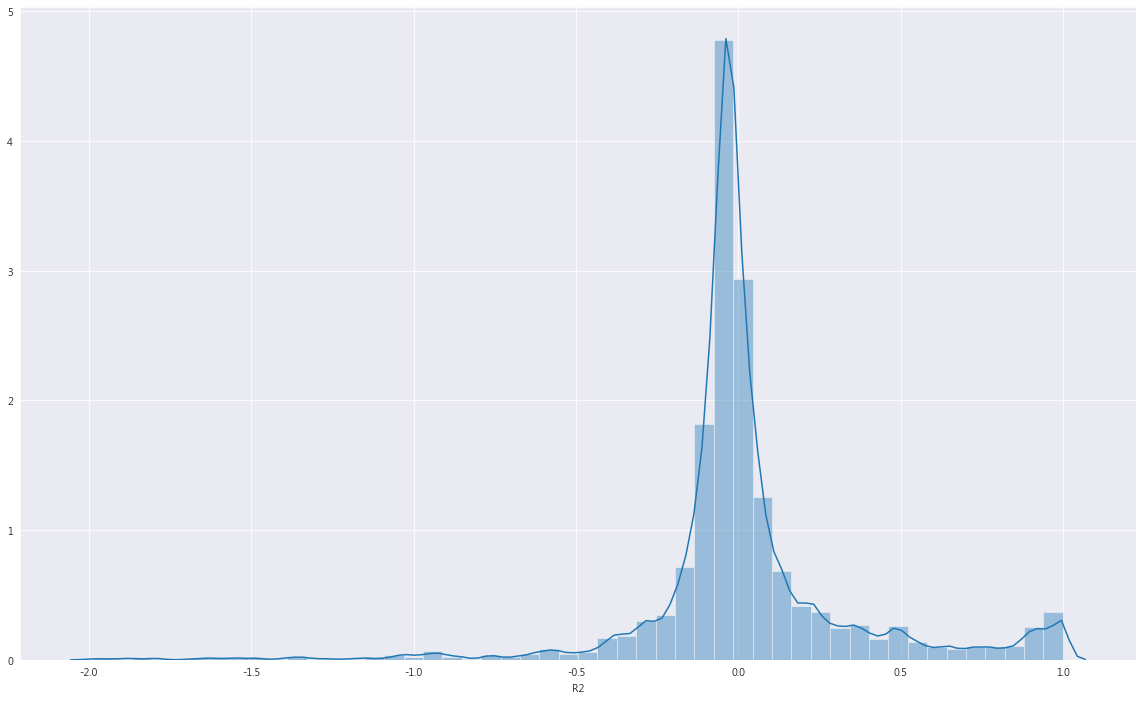

In [62]:
fig, ax = plt.subplots(figsize=(20,12))
sns.distplot(record['R2'])

In [66]:
record['R2'][record['R2']>0.5].count()

226

結論，大部分的基金用Pct_TWII	Pct_0050解釋例仍稍有不足，大家可以集思廣益還有什麼樣的檢測方法